# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [13]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
import numpy as np

years = mdates.YearLocator()

months = mdates.MonthLocator()

monthFmt = mdates.DateFormatter("%b")

%matplotlib notebook

In [14]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [15]:
leap_years = df.Date.str.endswith('02-29') #mask for all years with a leap day in it

In [16]:
df = df[~leap_years]
    # inverted the leap year mask to exclude all the leap day obs. from the data
df['Date'] = pd.to_datetime(df['Date'])
    # converted str dates to timestamp data type for later graphing

In [17]:
## Split into 2 dfs 1 w/ 2015 data and other with all preceding data
df_TF = df.loc[(df['Date'] >= '2015-01-01')] 
    # df with only 2015 data
df_else = df.loc[~(df['Date'] >= '2015-01-01')] 
    # df data with 2015 exclude to graph lows and highs


In [18]:
## Split the data before 2015 into the TMIN and TMAX to then graph the data
min_mask = df_else.Element.str.contains('TMIN')
    # boolean mask for only the TMIN data
df_lows = df_else.loc[min_mask]
    # return a df with only the TMIN data
df_lows = df_lows.groupby(by='Date').min()
    # splits df into smaller dfs by date, then gets the min value for each of those and returns those min values
df_highs = df_else[~min_mask]
    # inverted the min mask to return only the highs data
df_highs = df_highs.groupby(by='Date').max()

min_mask2 = df_TF.Element.str.contains('TMIN')

df_TFmin = df_TF.loc[min_mask2].groupby(by='Date').min()
df_TFmax = df_TF.loc[~min_mask2].groupby(by='Date').max()
    ## created only max and min data, and only the highest or lowest data point from each day of the data set.
df_TFmin['Data_Value'] = df_TFmin.Data_Value.div(10)
df_TFmax['Data_Value'] = df_TFmax.Data_Value.div(10)

In [19]:

df_lows.reset_index(inplace=True)

df_TFmax.reset_index(inplace=True)

df_TFmin.reset_index(inplace=True)


df_highs.reset_index(inplace=True)

In [20]:
low_month_day = df_lows['Date'].apply(lambda x: str(x)[5:10])
high_month_day = df_highs['Date'].apply(lambda x: str(x)[5:10])


In [21]:
df_highs['Date'] = high_month_day
df_lows['Date'] = low_month_day
df_lows = df_lows.groupby('Date').min()
df_highs = df_highs.groupby('Date').max()
df_highs['Data_Value'] = df_highs['Data_Value'].div(10)
df_lows['Data_Value'] = df_lows['Data_Value'].div(10)
df_lows.rename(index = lambda x: pd.to_datetime(x, format ='%m-%d').replace(year = 2015), inplace = True)
df_lows.sort_index(inplace = True)
df_highs.rename(index = lambda x: pd.to_datetime(x, format ='%m-%d').replace(year = 2015), inplace = True)
df_highs.sort_index(inplace = True)




In [22]:
df_lows['TF_Data'] = pd.Series(np.array(df_TFmin.Data_Value), index=df_lows.index)
df_highs['TF_Data'] = pd.Series(np.array(df_TFmax.Data_Value), index=df_lows.index)
highest = df_highs.loc[(df_highs['TF_Data'] > df_highs['Data_Value']),:]
lowest = df_lows.loc[(df_lows['TF_Data'] < df_lows['Data_Value']),:]


<IPython.core.display.Javascript object>


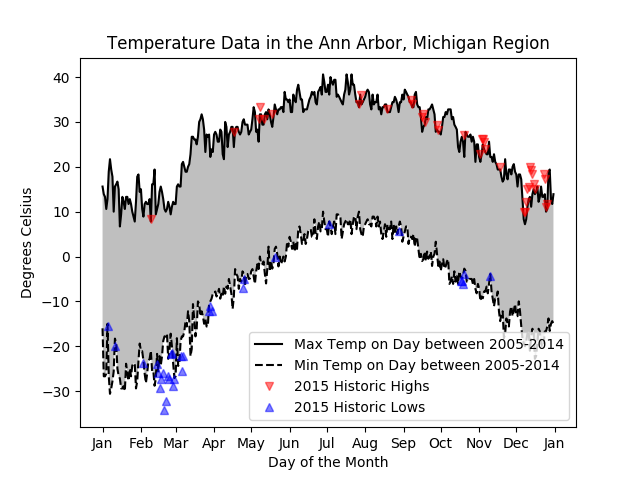

In [23]:
fig, ax = plt.subplots()

historic_H = ax.plot(df_highs['Data_Value'] ,'-',label="Max Temp on Day between 2005-2014",  color='black')

historic_H = ax.plot(df_lows['Data_Value'],'--', label="Min Temp on Day between 2005-2014", color='black')
highs = ax.plot(highest['TF_Data'], 'rv', label='2015 Historic Highs', alpha=0.5)

lows = ax.plot(lowest['TF_Data'], 'b^', label='2015 Historic Lows', alpha=0.5)

ax.xaxis.set_major_locator(months)

ax.xaxis.set_major_formatter(monthFmt)

ax.fill_between(df_highs.index , df_highs['Data_Value'], df_lows['Data_Value'], alpha=0.5, facecolor='grey')

plt.ylabel('Degrees Celsius')
plt.xlabel('Day of the Month')
plt.title('Temperature Data in the Ann Arbor, Michigan Region')
plt.legend(loc=0)